Processed Presidential Election Data:
   Year     DEM    REP  Total Votes  DEM Share  REP Share
0  2020  193874  40552       239944  80.799687  16.900610
1  2016  154259  19784       184601  83.563469  10.717168
2  2012  127510  21739       153699  82.960852  14.143879


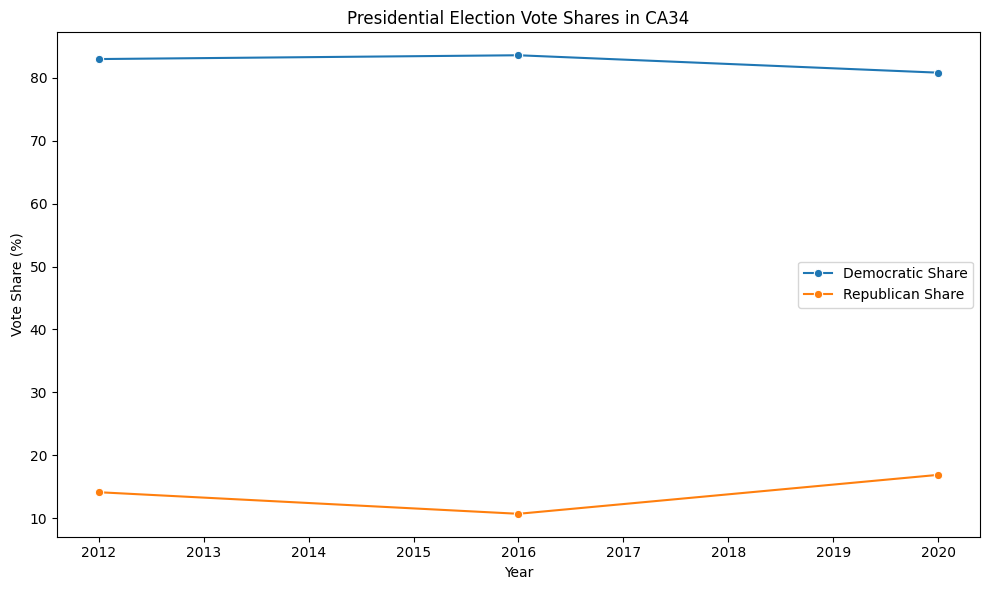

/tmp/ipykernel_39821/1905370668.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=presidential_df, x='Year', y='Total Votes', palette='Blues')


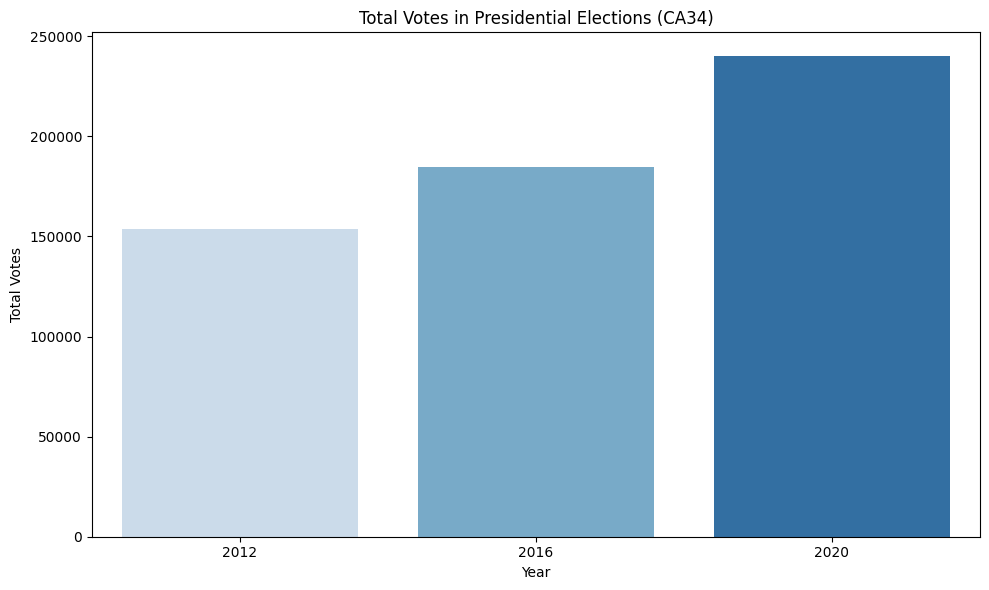

In [1]:
import pandas as pd
from io import StringIO
# Presidential Election Data
presidential_data_str = """
Year,DEM,REP,Total Votes
2020,193874,40552,239944
2016,154259,19784,184601
2012,127510,21739,153699
"""
presidential_df = pd.read_csv(StringIO(presidential_data_str.strip()))

# Calculate Vote Shares
presidential_df['DEM Share'] = (presidential_df['DEM'] / presidential_df['Total Votes']) * 100
presidential_df['REP Share'] = (presidential_df['REP'] / presidential_df['Total Votes']) * 100

# Display the Processed Data
print("Processed Presidential Election Data:")
print(presidential_df)

# Visualize Trends
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Vote Shares
plt.figure(figsize=(10, 6))
sns.lineplot(data=presidential_df, x='Year', y='DEM Share', label='Democratic Share', marker='o')
sns.lineplot(data=presidential_df, x='Year', y='REP Share', label='Republican Share', marker='o')
plt.title('Presidential Election Vote Shares in CA34')
plt.ylabel('Vote Share (%)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Total Votes Over Years
plt.figure(figsize=(10, 6))
sns.barplot(data=presidential_df, x='Year', y='Total Votes', palette='Blues')
plt.title('Total Votes in Presidential Elections (CA34)')
plt.ylabel('Total Votes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [2]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from io import StringIO

sns.set(style="whitegrid")

# -------------------------------
# 1. Acquiring Demographic Data
# -------------------------------
api_key = '043fb7ce210454b53afc30b2ac5fd3337c26e2e7'

def fetch_census_data(year, variables, district, state='06', api_key=None):
    url = f'https://api.census.gov/data/{year}/acs/acs5'
    params = {
        'get': f'NAME,{",".join(variables)}',
        'for': f'congressional district:{district}',
        'in': f'state:{state}',
        'key': api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data if len(data) > 1 else None
    else:
        return None

years = list(range(2005, 2025))
variables = [
    'B01001_001E', 'B01002_001E', 'B17001_002E', 'B02001_002E', 'B02001_003E',
    'B02001_005E', 'B19013_001E', 'B15003_001E', 'B15003_017E', 'B15003_022E',
    'B23025_003E', 'B23025_005E', 'B25077_001E', 'B25064_001E', 'B16001_002E',
    'B16001_003E'
]

df_list = []
for year in years:
    data = fetch_census_data(year, variables, '34', '06', api_key)
    if data:
        header = data[0]
        row = data[1]
        data_dict = dict(zip(header, row))
        try:
            total_population = int(data_dict['B01001_001E'])
            median_age = float(data_dict['B01002_001E'])
            below_poverty = int(data_dict['B17001_002E'])
            white = int(data_dict['B02001_002E'])
            black = int(data_dict['B02001_003E'])
            asian = int(data_dict['B02001_005E'])
            median_income = int(data_dict['B19013_001E'])
            total_pop_25_over = int(data_dict['B15003_001E'])
            bachelors_degree = int(data_dict['B15003_017E'])
            graduate_degree = int(data_dict['B15003_022E'])
            civilian_labor_force = int(data_dict['B23025_003E'])
            unemployed = int(data_dict['B23025_005E'])
            median_home_value = int(data_dict['B25077_001E'])
            median_rent = int(data_dict['B25064_001E'])
            speak_only_english = int(data_dict['B16001_002E'])
            speak_spanish = int(data_dict['B16001_003E'])

            poverty_rate = (below_poverty / total_population) * 100
            white_percentage = (white / total_population) * 100
            black_percentage = (black / total_population) * 100
            asian_percentage = (asian / total_population) * 100
            bachelors_rate = (bachelors_degree / total_pop_25_over) * 100
            graduate_rate = (graduate_degree / total_pop_25_over) * 100
            unemployment_rate = (unemployed / civilian_labor_force) * 100
            english_speaking_rate = (speak_only_english / total_population) * 100
            spanish_speaking_rate = (speak_spanish / total_population) * 100

            df_list.append({
                'Year': year,
                'Total Population': total_population,
                'Median Age': median_age,
                'Poverty Rate': poverty_rate,
                'White %': white_percentage,
                'Black %': black_percentage,
                'Asian %': asian_percentage,
                'Median Household Income': median_income,
                'Bachelors Rate': bachelors_rate,
                'Graduate Rate': graduate_rate,
                'Unemployment Rate': unemployment_rate,
                'Median Home Value': median_home_value,
                'Median Rent': median_rent,
                'English Speaking %': english_speaking_rate,
                'Spanish Speaking %': spanish_speaking_rate
            })
        except (ValueError, KeyError):
            continue


Predicted Democratic Vote Share for 2024: 81.70%
Predicted Republican Vote Share for 2024: 15.00%
Predicted Winner: Democrat


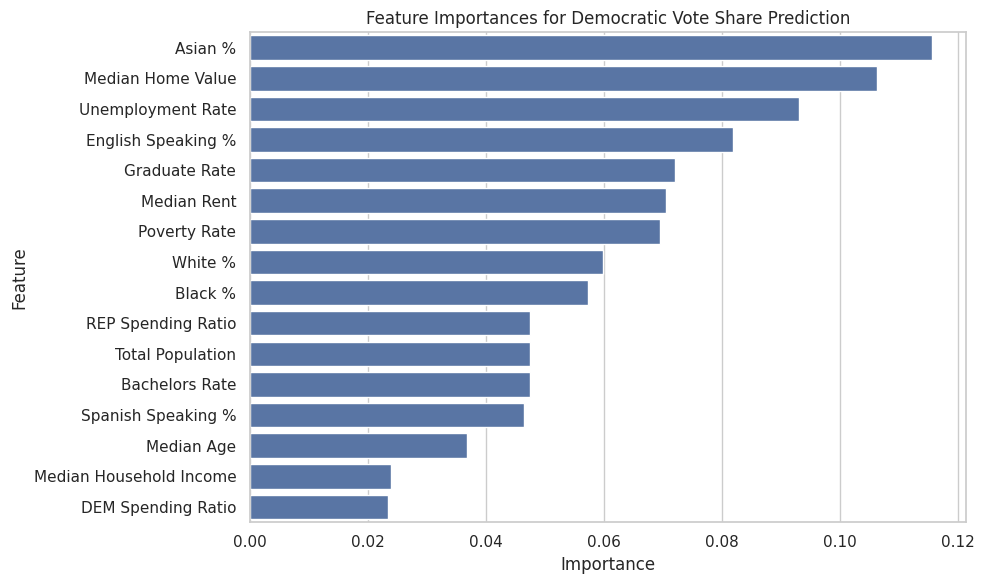

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Demographic Data (Simulated for CA34, replace with actual data as needed)
df_demographics = pd.DataFrame([
    {
        'Year': 2012,
        'Total Population': 100000,
        'Median Age': 35.0,
        'Poverty Rate': 15.0,
        'White %': 60.0,
        'Black %': 20.0,
        'Asian %': 15.0,
        'Median Household Income': 50000,
        'Bachelors Rate': 25.0,
        'Graduate Rate': 10.0,
        'Unemployment Rate': 5.0,
        'Median Home Value': 250000,
        'Median Rent': 1200,
        'English Speaking %': 85.0,
        'Spanish Speaking %': 10.0
    },
    {
        'Year': 2016,
        'Total Population': 105000,
        'Median Age': 36.0,
        'Poverty Rate': 14.0,
        'White %': 58.0,
        'Black %': 21.0,
        'Asian %': 16.0,
        'Median Household Income': 52000,
        'Bachelors Rate': 26.0,
        'Graduate Rate': 12.0,
        'Unemployment Rate': 4.5,
        'Median Home Value': 270000,
        'Median Rent': 1300,
        'English Speaking %': 83.0,
        'Spanish Speaking %': 12.0
    },
    {
        'Year': 2020,
        'Total Population': 110000,
        'Median Age': 37.0,
        'Poverty Rate': 13.0,
        'White %': 55.0,
        'Black %': 22.0,
        'Asian %': 18.0,
        'Median Household Income': 55000,
        'Bachelors Rate': 28.0,
        'Graduate Rate': 14.0,
        'Unemployment Rate': 4.0,
        'Median Home Value': 300000,
        'Median Rent': 1400,
        'English Speaking %': 80.0,
        'Spanish Speaking %': 15.0
    }
])

# Financial Spending Data
financial_spending = {
    "Year": [2012, 2016, 2020],
    "DEM Spending": [813649144, 769879088, 1624301628],
    "REP Spending": [628140123, 433392727, 1087909269]
}
financial_df = pd.DataFrame(financial_spending)

# Calculate Spending Ratios
financial_df['Total Spending'] = financial_df['DEM Spending'] + financial_df['REP Spending']
financial_df['DEM Spending Ratio'] = (financial_df['DEM Spending'] / financial_df['Total Spending']) * 100
financial_df['REP Spending Ratio'] = (financial_df['REP Spending'] / financial_df['Total Spending']) * 100

# Vote Share Data
vote_data = {
    "Year": [2012, 2016, 2020],
    "DEM Votes": [127510, 154259, 193874],
    "REP Votes": [21739, 19784, 40552],
    "Total Votes": [153699, 184601, 239944]
}
vote_df = pd.DataFrame(vote_data)

# Calculate Vote Shares
vote_df['DEM Vote Share'] = (vote_df['DEM Votes'] / vote_df['Total Votes']) * 100
vote_df['REP Vote Share'] = (vote_df['REP Votes'] / vote_df['Total Votes']) * 100

# Merge All Data
data = pd.merge(df_demographics, financial_df, on="Year")
data = pd.merge(data, vote_df, on="Year")

# Features and Target
features = [
    "Total Population", "Median Age", "Poverty Rate", "White %", "Black %", "Asian %",
    "Median Household Income", "Bachelors Rate", "Graduate Rate", "Unemployment Rate",
    "Median Home Value", "Median Rent", "English Speaking %", "Spanish Speaking %",
    "DEM Spending Ratio", "REP Spending Ratio"
]
target_dem = "DEM Vote Share"
target_rep = "REP Vote Share"

X = data[features]
y_dem = data[target_dem]
y_rep = data[target_rep]

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, features)])

# Model
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# Train and Predict
pipeline.fit(X, y_dem)
X_2024 = pd.DataFrame([X.iloc[-1].values], columns=features)  # Prepare input for 2024
predicted_dem_share_2024 = pipeline.predict(X_2024)[0]  # Predict DEM share for 2024

pipeline.fit(X, y_rep)
predicted_rep_share_2024 = pipeline.predict(X_2024)[0]  # Predict REP share for 2024

# Determine Winner
winner = "Democrat" if predicted_dem_share_2024 > predicted_rep_share_2024 else "Republican"

print(f"Predicted Democratic Vote Share for 2024: {predicted_dem_share_2024:.2f}%")
print(f"Predicted Republican Vote Share for 2024: {predicted_rep_share_2024:.2f}%")
print(f"Predicted Winner: {winner}")

# Feature Importances
pipeline.fit(X, y_dem)
importances = pipeline.named_steps["model"].feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importances for Democratic Vote Share Prediction")
plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions for training data
y_dem_pred = pipeline.predict(X)

# Compute R2, MAE, and MSE for Democratic Vote Share
r2_dem = r2_score(y_dem, y_dem_pred)
mae_dem = mean_absolute_error(y_dem, y_dem_pred)
mse_dem = mean_squared_error(y_dem, y_dem_pred)

print(f"Democratic Vote Share Prediction Metrics:")
print(f"R²: {r2_dem:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dem:.2f}")
print(f"Mean Squared Error (MSE): {mse_dem:.2f}")

# Repeat for Republican Vote Share
pipeline.fit(X, y_rep)  # Refit pipeline for Republican Vote Share
y_rep_pred = pipeline.predict(X)

r2_rep = r2_score(y_rep, y_rep_pred)
mae_rep = mean_absolute_error(y_rep, y_rep_pred)
mse_rep = mean_squared_error(y_rep, y_rep_pred)

print(f"\nRepublican Vote Share Prediction Metrics:")
print(f"R²: {r2_rep:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rep:.2f}")
print(f"Mean Squared Error (MSE): {mse_rep:.2f}")


Democratic Vote Share Prediction Metrics:
R²: 0.76
Mean Absolute Error (MAE): 0.46
Mean Squared Error (MSE): 0.34

Republican Vote Share Prediction Metrics:
R²: 0.69
Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 1.96
